# 앙상블 (Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  
  1. 평균 방법 <br>
   - 여러개의 추정값을 독립적으로 구한 뒤 평균을 취함<br>
   - 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임<br>
  2. 부스팅 방법 <br>
   - 순차적으로 모델 생성<br>
   - 결합된 모델의 편향을 감소시키기 위해 노력<br>
   - 부스팅 방법의 목표는 여러 개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구
     축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [2]:
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### 데이터 Load

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
diabete = load_diabetes()

### Bagging을 사용한 분류

#### KNN

##### 붓꽃 데이터

In [53]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [5]:
# base model(KNN)에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0005663394927978516 (+/- 0.00016621195934967857)
Average score time : 0.0013215065002441407 (+/- 0.0008401108402996476)
Average test score : 0.96 (+/- 0.024944382578492935)


In [6]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.00726785659790039 (+/- 0.0009848648919629952)
Average score time : 0.0022675514221191405 (+/- 0.00037162692976001926)
Average test score : 0.9466666666666667 (+/- 0.04521553322083511)


##### 와인 데이터

In [7]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [8]:
# base model(KNN)에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0005108356475830078 (+/- 0.00023151554332472983)
Average score time : 0.0007340431213378907 (+/- 8.839465199933483e-05)
Average test score : 0.9493650793650794 (+/- 0.037910929811115976)


In [9]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.007219886779785157 (+/- 0.000641058243939844)
Average score time : 0.0025787830352783205 (+/- 0.0006486629424939792)
Average test score : 0.9550793650793651 (+/- 0.03389771640725385)


##### 유방암 데이터

In [10]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [11]:
# base model(KNN)에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0006381511688232422 (+/- 9.446547276742709e-05)
Average score time : 0.006143379211425781 (+/- 0.0067580838663110765)
Average test score : 0.9648501785437045 (+/- 0.009609970350036127)


In [12]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.007640457153320313 (+/- 0.0005666513504554245)
Average score time : 0.005556774139404297 (+/- 0.000558662430830643)
Average test score : 0.9595714951094549 (+/- 0.011922704611312757)


#### SVC

##### 붓꽃 데이터

In [13]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [14]:
# base model(SVC)에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0007016181945800782 (+/- 0.0001306202595904966)
Average score time : 0.0002660274505615234 (+/- 4.068329252409319e-05)
Average test score : 0.9666666666666666 (+/- 0.02108185106778919)


In [15]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.01182398796081543 (+/- 0.0008415063995317004)
Average score time : 0.0013929843902587891 (+/- 6.495470798340988e-05)
Average test score : 0.9466666666666667 (+/- 0.039999999999999994)


##### 와인 데이터

In [16]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [17]:
# base model(SVC)에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0011389732360839843 (+/- 0.0003574777733224659)
Average score time : 0.0003360271453857422 (+/- 5.20151754899917e-05)
Average test score : 0.9833333333333334 (+/- 0.022222222222222233)


In [18]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.01172337532043457 (+/- 0.001213217434753439)
Average score time : 0.0016028881072998047 (+/- 0.00010367442137858751)
Average test score : 0.9722222222222221 (+/- 0.024845199749997673)


##### 유방암 데이터

In [19]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [20]:
# base model(SVC)에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.002528095245361328 (+/- 0.001200906535969874)
Average score time : 0.000990009307861328 (+/- 0.00018473083844011587)
Average test score : 0.9736376339077782 (+/- 0.014678541667933545)


In [21]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.014982175827026368 (+/- 0.0009884663657203012)
Average score time : 0.004450273513793945 (+/- 0.000520401763489023)
Average test score : 0.9683744760130415 (+/- 0.014235793790533947)


#### Decision Tree

##### 붓꽃 데이터

In [22]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [23]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0006312370300292969 (+/- 0.00023217370167209888)
Average score time : 0.00021519660949707032 (+/- 7.082157174023937e-05)
Average test score : 0.9600000000000002 (+/- 0.03265986323710903)


In [24]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.0085540771484375 (+/- 0.0009414127868686255)
Average score time : 0.0007780075073242187 (+/- 9.332976208120457e-05)
Average test score : 0.9400000000000001 (+/- 0.044221663871405324)


##### 와인 데이터

In [25]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [26]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0008047580718994141 (+/- 0.00021143045627417233)
Average score time : 0.00018725395202636718 (+/- 2.6616997207922402e-05)
Average test score : 0.8709523809523809 (+/- 0.05700512501657816)


In [27]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.009151554107666016 (+/- 0.0007842837138642229)
Average score time : 0.0007763385772705078 (+/- 2.388206905669651e-05)
Average test score : 0.961111111111111 (+/- 0.03333333333333335)


##### 유방암 데이터

In [28]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [29]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.004326820373535156 (+/- 0.00015350964907537398)
Average score time : 0.00028018951416015626 (+/- 7.390812902805537e-05)
Average test score : 0.9208973761838223 (+/- 0.00802356517330841)


In [30]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.015080499649047851 (+/- 0.0006339050548025823)
Average score time : 0.0008547782897949218 (+/- 2.739901497846944e-05)
Average test score : 0.9543083372147182 (+/- 0.01508357102210017)


### Bagging을 사용한 회귀

#### KNN

##### 당뇨병 데이터

In [54]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [55]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0007844448089599609 (+/- 0.0007032625258205292)
Average score time : 0.0006467819213867188 (+/- 0.0001381876552571685)
Average test score : 0.3689720650295623 (+/- 0.044659049060165365)


In [56]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.006945896148681641 (+/- 0.0017249592429780611)
Average score time : 0.0027626991271972657 (+/- 0.00014507613616132305)
Average test score : 0.4073757242707889 (+/- 0.056215291409832405)


#### SVR

##### 당뇨병 데이터

In [58]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [59]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0033536434173583986 (+/- 0.0010419195288599234)
Average score time : 0.0013229846954345703 (+/- 0.00013448160522820465)
Average test score : 0.14659868748701582 (+/- 0.02190883171995428)


In [60]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.012823200225830078 (+/- 0.001127171782437421)
Average score time : 0.0059775829315185545 (+/- 8.385278705556532e-05)
Average test score : 0.052466907785921245 (+/- 0.035287358299054904)


#### Decision Tree

##### 당뇨병 데이터

In [64]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [65]:
# base model에 대한 교차 검증
cross_val = cross_validate(
    estimator=base_model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.0025599002838134766 (+/- 0.0011168314159167466)
Average score time : 0.0003991127014160156 (+/- 0.00019381697249957257)
Average test score : -0.13368909674457394 (+/- 0.10381222489386663)


In [66]:
# bagging model에 대한 교차 검증
cross_val = cross_validate(
    estimator=bagging_model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# 시간이 조금 더 걸리고, 결과는 비슷함

Average fit time : 0.012042379379272461 (+/- 0.0012046393252135809)
Average score time : 0.0008491992950439454 (+/- 4.545296233205612e-05)
Average test score : 0.35726184685029755 (+/- 0.06486239375267511)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [67]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

#### 붓꽃 데이터

In [70]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [71]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.04901332855224609 (+/- 0.0035479358135253464)
Average score time : 0.0028106689453125 (+/- 0.00022391774376707738)
Average test score : 0.96 (+/- 0.024944382578492935)


#### 와인 데이터

In [72]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [73]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.051998233795166014 (+/- 0.0028332433646566318)
Average score time : 0.00282435417175293 (+/- 9.669705004583435e-05)
Average test score : 0.9777777777777779 (+/- 0.027216552697590882)


#### 유방암 데이터

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [74]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.09063043594360351 (+/- 0.010991933772743203)
Average score time : 0.0030622959136962892 (+/- 0.00028287861144793186)
Average test score : 0.9578636857630803 (+/- 0.021016465852143063)


### Random Forests 회귀

#### 당뇨병 데이터

In [77]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [78]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.11854777336120606 (+/- 0.003777326279568353)
Average score time : 0.0038262367248535155 (+/- 0.0013698468845919304)
Average test score : 0.43095208037263577 (+/- 0.0411402094893165)


## Extremely of Randomized Trees 분류

#### 붓꽃 데이터

In [84]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [85]:
cross_val = cross_validate(
    estimator=model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.03699679374694824 (+/- 0.0034454705124121535)
Average score time : 0.002724361419677734 (+/- 0.00012371332158010249)
Average test score : 0.9533333333333334 (+/- 0.03399346342395189)


#### 와인 데이터

In [86]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [87]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.03866138458251953 (+/- 0.0034059997417950293)
Average score time : 0.0027985572814941406 (+/- 0.00010261165601588621)
Average test score : 0.9776190476190475 (+/- 0.020831783767013237)


#### 유방암 데이터

In [88]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [89]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.047198820114135745 (+/- 0.0009210152654327994)
Average score time : 0.0032033920288085938 (+/- 6.12512132087881e-05)
Average test score : 0.9648657040832168 (+/- 0.022856715932671245)


## Extremely of Randomized Trees 회귀

#### 당뇨병 데이터

In [90]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [91]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.07732019424438477 (+/- 0.0025927489707161895)
Average score time : 0.0032752513885498046 (+/- 0.00010283517072390687)
Average test score : 0.4351249392538289 (+/- 0.03357328274882699)


## Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [92]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

plt.style.use(['seaborn-whitegrid'])


/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_31611/3371511337.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [94]:
n_classes = 3  # iris data의 class는 3개
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [95]:
iris = load_iris()
plot_idx = 1
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators)
]

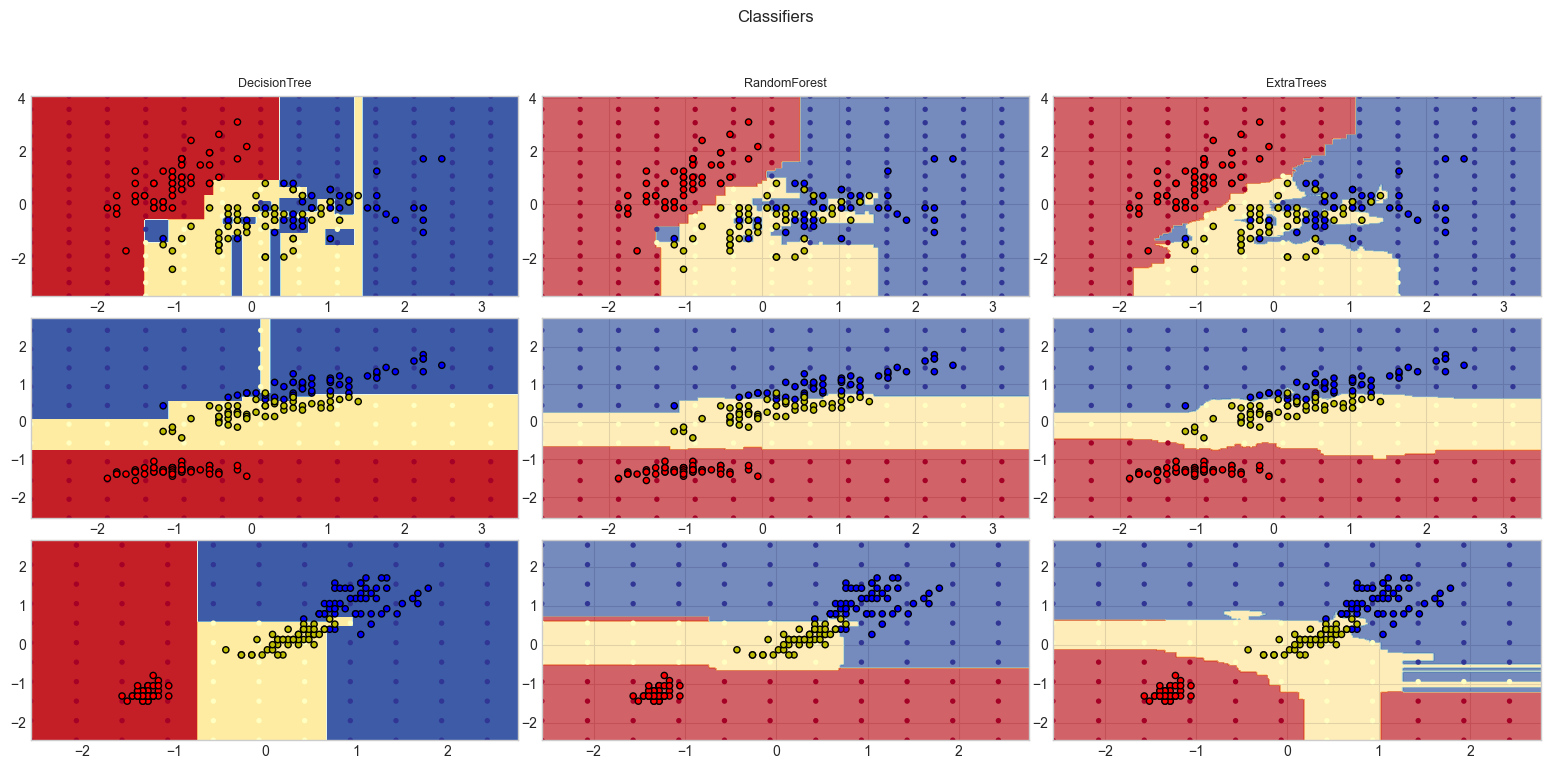

In [98]:
plt.figure(figsize=(16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):
  for model in models:
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X, y)
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
    plt.subplot(3, 3, plot_idx)

    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
    
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20)
    plot_idx += 1


plt.suptitle("Classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [99]:
plot_idx = 1
models = [
    DecisionTreeRegressor(max_depth=None),
    RandomForestRegressor(n_estimators=n_estimators),
    ExtraTreesRegressor(n_estimators=n_estimators)
]

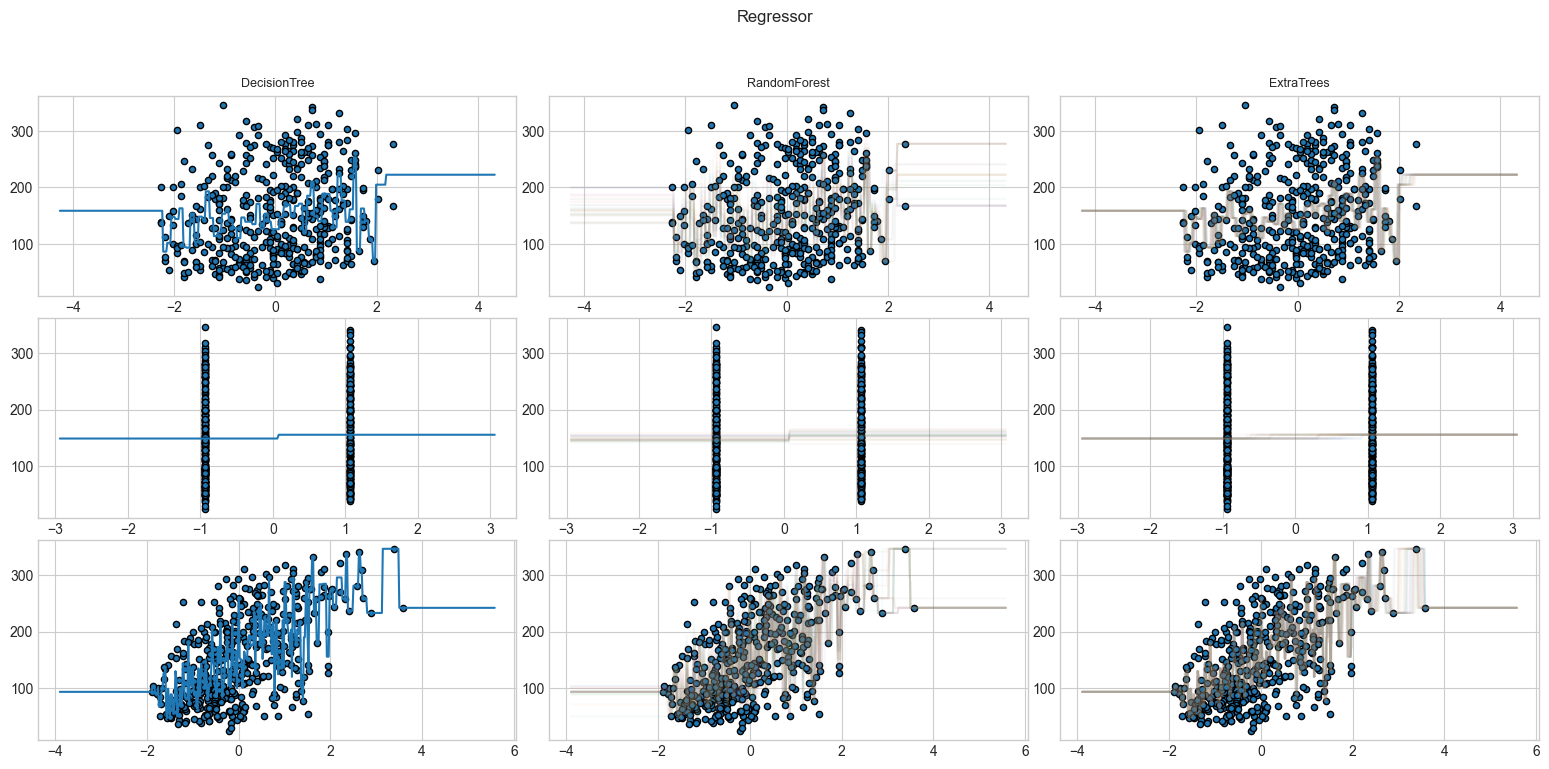

In [102]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):
  for model in models:
    X = diabete.data[:, pair]
    y = diabete.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)

    X = X[idx]
    y = y[idx]
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)
    model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]
    plt.subplot(3, 3, plot_idx)

    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1, 1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs= plt.plot(xx, Z, alpha=estimator_alpha)
    
    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1

    
plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* `수정된 버전의 데이터를 반복 학습 (가중치가 적용된)`
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 `개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습`
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

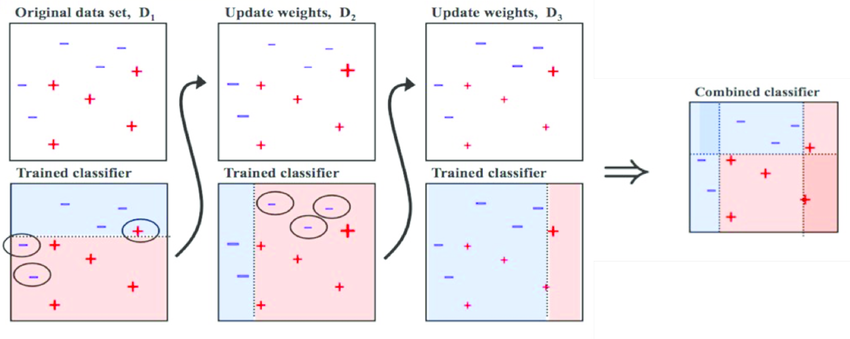

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [7]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [9]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.024002838134765624 (+/- 0.0016866702293619842)
Average score time : 0.0019789695739746093 (+/- 0.00011711324463228702)
Average test score : 0.9466666666666667 (+/- 0.03399346342395189)


In [10]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.030031681060791016 (+/- 0.0043022893372123535)
Average score time : 0.001950693130493164 (+/- 5.6469962643300154e-05)
Average test score : 0.8028571428571428 (+/- 0.16007729929178363)


In [ ]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

In [11]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.06798257827758789 (+/- 0.0039886414959081455)
Average score time : 0.0021502017974853516 (+/- 5.1581483528365594e-05)
Average test score : 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [12]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [13]:
# base model(DecisionTreeClassifier())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.03320598602294922 (+/- 0.0043893485528451156)
Average score time : 0.001331472396850586 (+/- 0.00016286984443221139)
Average test score : 0.4181390053742973 (+/- 0.058102762398166106)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [15]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [16]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.07773056030273437 (+/- 0.0022199654396838336)
Average score time : 0.0004047870635986328 (+/- 4.4501809746234196e-05)
Average test score : 0.9666666666666668 (+/- 0.02108185106778919)


In [17]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=wine.data, y=wine.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.14300069808959961 (+/- 0.004063897137011013)
Average score time : 0.0004603862762451172 (+/- 6.605545828410523e-05)
Average test score : 0.9385714285714286 (+/- 0.032068206474093704)


In [18]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=cancer.data, y=cancer.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.24539709091186523 (+/- 0.006435198857223664)
Average score time : 0.0004466056823730469 (+/- 1.6964549977983987e-05)
Average test score : 0.9613724576929048 (+/- 0.022574828498321483)


### Gradient Tree Boosting 회귀

In [19]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [21]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=model, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.05347881317138672 (+/- 0.0021269356510880476)
Average score time : 0.0004092216491699219 (+/- 3.994022877494762e-05)
Average test score : 0.40635737119025245 (+/- 0.06845696753702737)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (Hard Voting)
  * 예측된 확률의 가중치 평균 (Soft Voting)

In [22]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [36]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard' # 가장 많이 예측된 클래스를 정답으로 채택
)

In [37]:
for model in (model1, model2, model3, vote_model) :
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print("Accuracy : %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy : 0.97 (+/- 0.02) [SVC]
Accuracy : 0.95 (+/- 0.03) [GaussianNB]
Accuracy : 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy : 0.96 (+/- 0.02) [VotingClassifier]


In [32]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft', # 예측된 확률의 가중치 평균
    weights=[2, 1, 2] # 가중치 정의
)

In [33]:
for model in (model1, model2, model3, vote_model) :
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print("Accuracy : %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy : 0.97 (+/- 0.02) [SVC]
Accuracy : 0.95 (+/- 0.03) [GaussianNB]
Accuracy : 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy : 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [39]:
X = iris.data[:, [0, 2]]
y = iris.target

In [40]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(
    estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
    voting='soft',
    weights=[2, 1, 2]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [43]:
import numpy as np

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

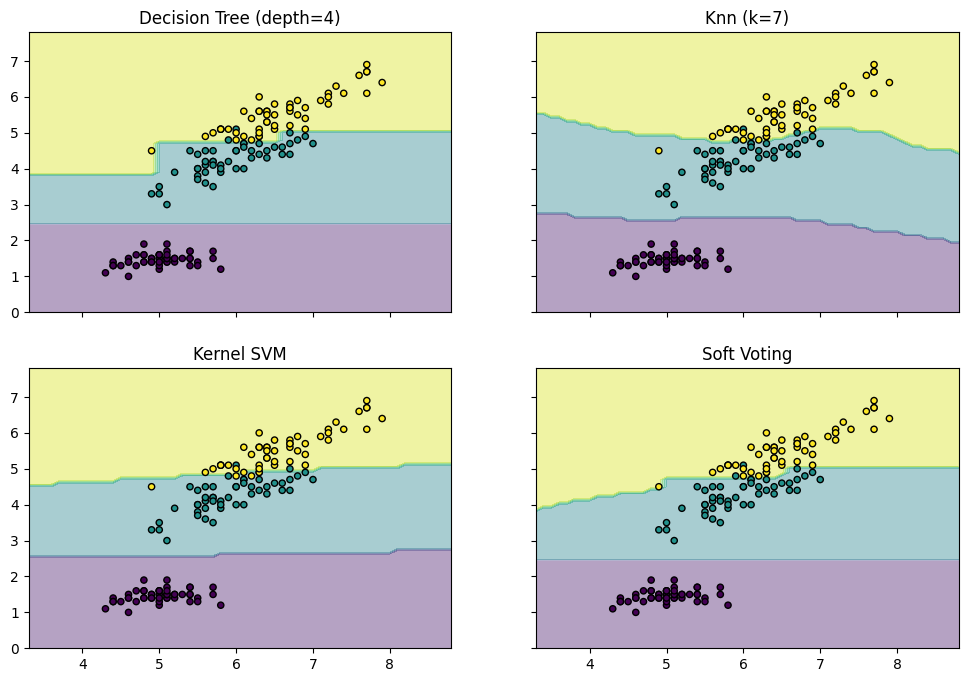

In [45]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, vote_model],
                        ['Decision Tree (depth=4)', 'Knn (k=7)',
                        'Kernel SVM', 'Soft Voting']) :
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show();

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [47]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]    
)

In [48]:
for model in (model1, model2, model3, vote_model) :
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, diabete.data, diabete.target, cv=5)
    print("R2 : %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

R2 : 0.48 (+/- 0.05) [LinearRegression]
R2 : 0.41 (+/- 0.07) [GradientBoostingRegressor]
R2 : 0.42 (+/- 0.04) [RandomForestRegressor]
R2 : 0.47 (+/- 0.05) [VotingRegressor]


### 회귀식 시각화

In [49]:
X = diabete.data[:, 0].reshape(-1, 1)
y = diabete.target

In [53]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]    
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [54]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

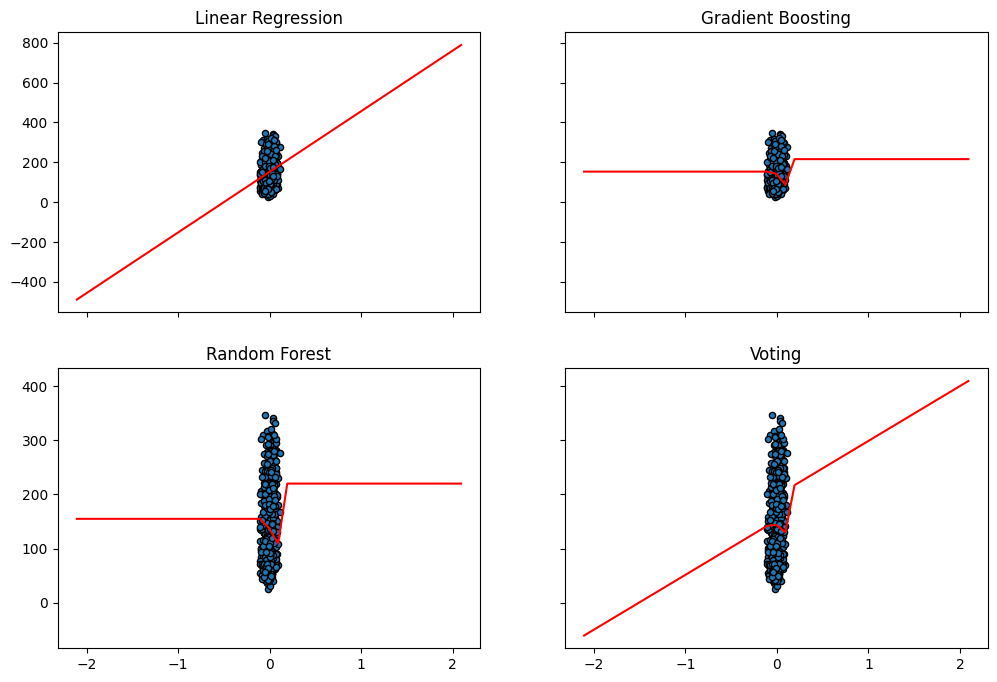

In [55]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, vote_model],
                        ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']) :
    Z = model.predict(xx.reshape(-1, 1))

    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show();


## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [86]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [87]:
estimators = [
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('svr', SVR())
]

In [88]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [89]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=reg, 
    X=diabete.data, y=diabete.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.05078883171081543 (+/- 0.003846161830162289)
Average score time : 0.001461029052734375 (+/- 5.322942402281606e-05)
Average test score : 0.3717839790745635 (+/- 0.0663536236892015)


#### 회귀식 시각화

In [90]:
X = diabete.data[:, 0].reshape(-1, 1)
y = diabete.target

In [91]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

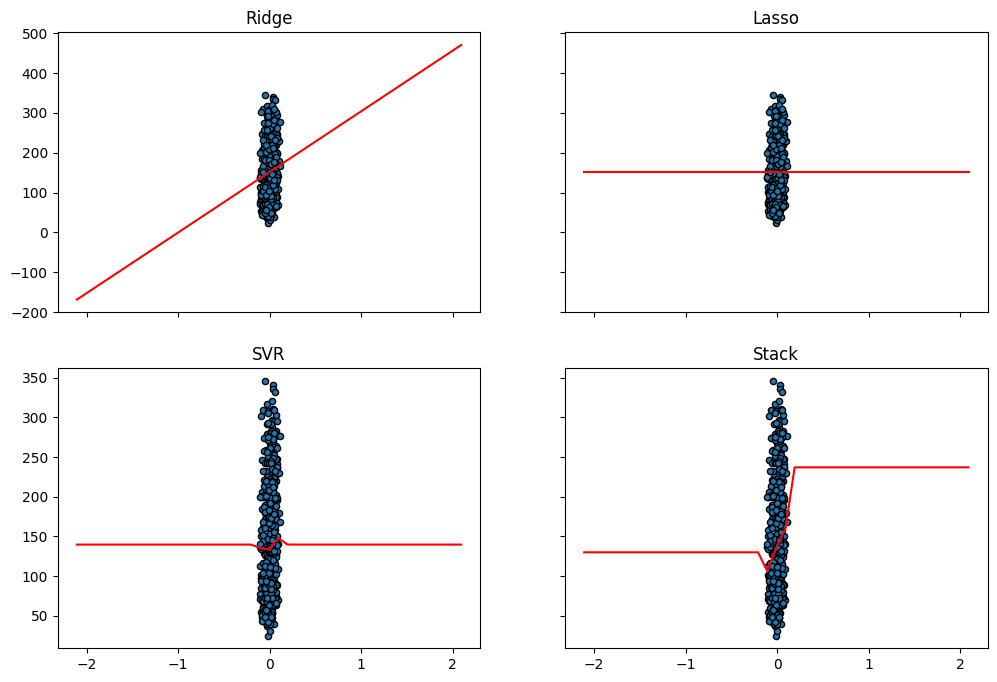

In [93]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, reg],
                        ['Ridge', 'Lasso', 'SVR', 'Stack']) :
    Z = model.predict(xx.reshape(-1, 1))

    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show();


### 스택 분류

In [94]:
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [96]:
estimators = [
    ('logistic', LogisticRegression(max_iter=10000)),
    ('svc', SVC()),
    ('naive', GaussianNB())]

In [97]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [99]:
# base model(())에 대한 교차 검증
cross_val = cross_validate(
    estimator=clf, 
    X=iris.data, y=iris.target,
    cv=5
)
print('Average fit time : {} (+/- {})' .format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('Average score time : {} (+/- {})' .format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('Average test score : {} (+/- {})' .format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

Average fit time : 0.08743019104003906 (+/- 0.003682824795823375)
Average score time : 0.0031517505645751952 (+/- 0.00010559188233789621)
Average test score : 0.9733333333333334 (+/- 0.02494438257849294)


#### 결정 경계 시각화

In [100]:
X = iris.data[:, [0, 2]]
y = iris.target

In [101]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [102]:
import numpy as np

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

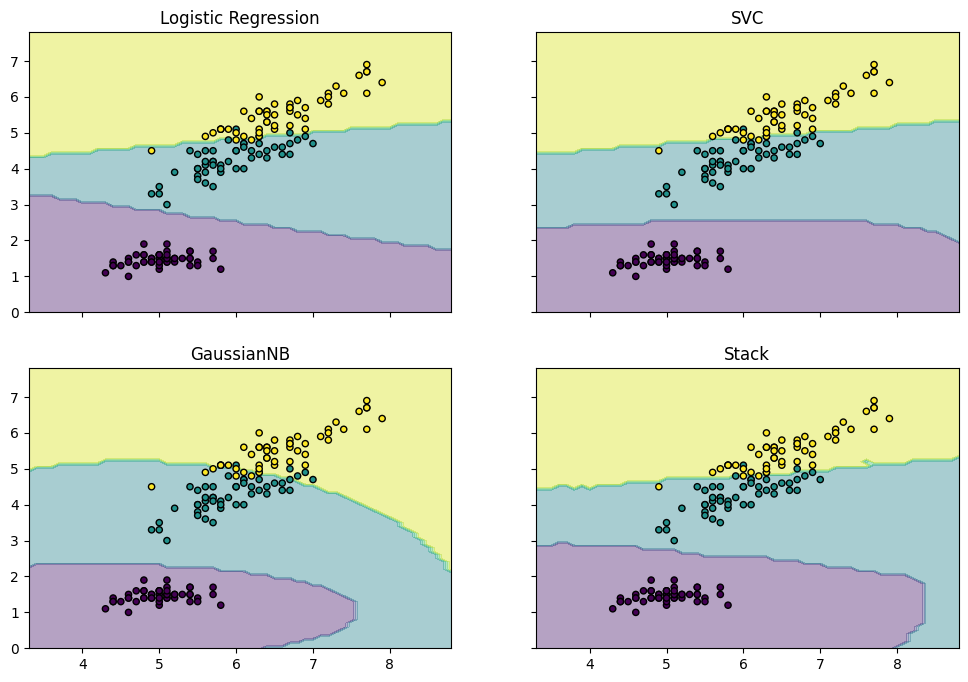

In [103]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))
for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC',
                           'GaussianNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)
plt.show()